<a href="https://colab.research.google.com/github/Geuens/curso_ai/blob/main/Diabetes_Carlos_Geuens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Detection positivos de Diabetes mediante despositivos en Farmacias


1. Definición del Problema y Objetivo de Negocio:
El objetivo de negocio es desarrollar un dispositivo que pueda predecir la probabilidad de desarrollar diabetes en base a ciertas características de los pacientes. Esto puede ayudar a las farmacias y otros puntos de atención médica a identificar a las personas con mayor riesgo y proporcionarles intervenciones preventivas o educativas.

## Lectura datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('Diabetes_es_ext.csv')
df.head()

,Embarazos,Glucosa,Presión sanguínea,Pliegue cutáneo,Insulina,Índice de masa corporal,Pedigrí diabetes,Edad,Diabetes,Medicación previa,Observaciones,Fecha de diagnóstico
0,6,148,72,35,0,"33,6","0,627",50,Sí,NaN,NaN,2016-01-04
1,1,85,66,29,0,"26,6","0,351",31,No,prozac,NaN,2016-01-04
2,8,183,64,0,0,"23,3","0,672",32,Sí,NaN,NaN,2016-01-04
3,1,89,66,23,94,"28,1","0,167",21,No,NaN,NaN,2016-01-05
4,0,137,40,35,168,"43,1","2,288",33,Sí,"omeoprazol,simvastatina",NaN,2016-01-05


### Analisis de Datos

In [ ]:
df.describe()

,Embarazos,Glucosa,Presión sanguínea,Pliegue cutáneo,Insulina,Edad
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,81.000000


In [ ]:
#df = df.dropna(how='all')

# Convertir la columna 'Fecha de diagnóstico' a tipo datetime
df['Fecha de diagnóstico'] = pd.to_datetime(df['Fecha de diagnóstico'], errors='coerce')


La glucosa es una variable de interés fundamental en los modelos de detección de diabetes debido a su papel central en la fisiopatología de esta enfermedad. La diabetes es un trastorno metabólico crónico caracterizado por niveles elevados de glucosa en sangre, lo que puede deberse a una producción inadecuada de insulina, resistencia a la insulina o ambas. Por lo tanto, la medición de la glucosa en sangre o sus derivados, como la hemoglobina glucosilada (HbA1c), se considera un marcador clave para la evaluación y diagnóstico de la diabetes.

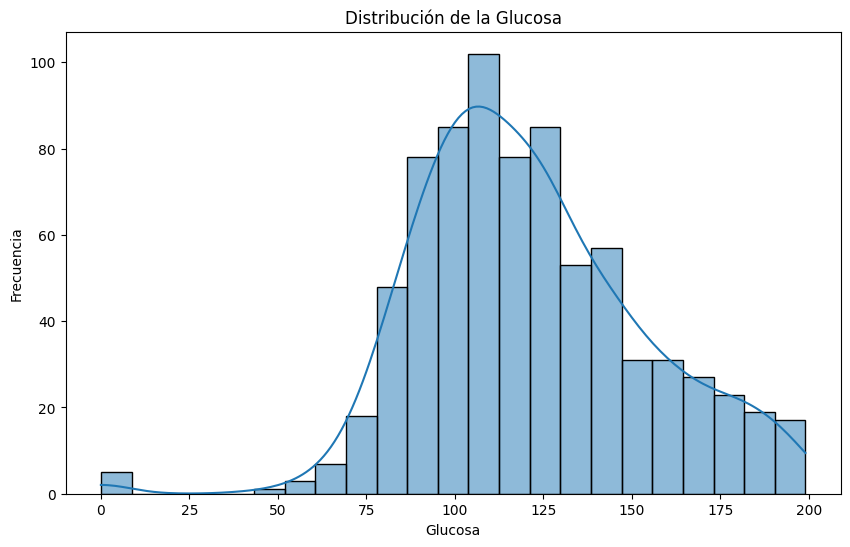

In [ ]:
# Histograma de la glucosa
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucosa'], kde=True)
plt.title('Distribución de la Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Frecuencia')
plt.show()

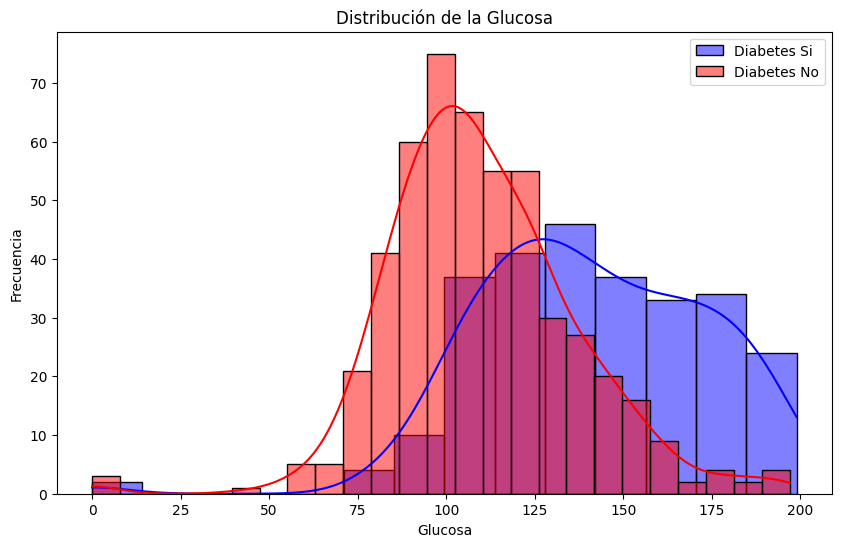

In [ ]:
# Filtrar los datos para separar los casos de diabetes y no diabetes
diabetes_si = df[df['Diabetes'] == 'Sí']
diabetes_no = df[df['Diabetes'] == 'No']

# Graficar histogramas bimodales para la glucosa
# Graficar histogramas bimodales para la glucosa
plt.figure(figsize=(10, 6))
sns.histplot(diabetes_si['Glucosa'], kde=True, color='blue', alpha=0.5, label='Diabetes Si')
sns.histplot(diabetes_no['Glucosa'], kde=True, color='red', alpha=0.5, label='Diabetes No')
plt.title('Distribución de la Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Se observa que los casos diagnosticados con diabetes, tiene claramente un nivel mas alto de glucosa, por lo que esta sera un variable fundamental del model

Se realiza ahora el mismo estudio de histogramas con el resto de variables

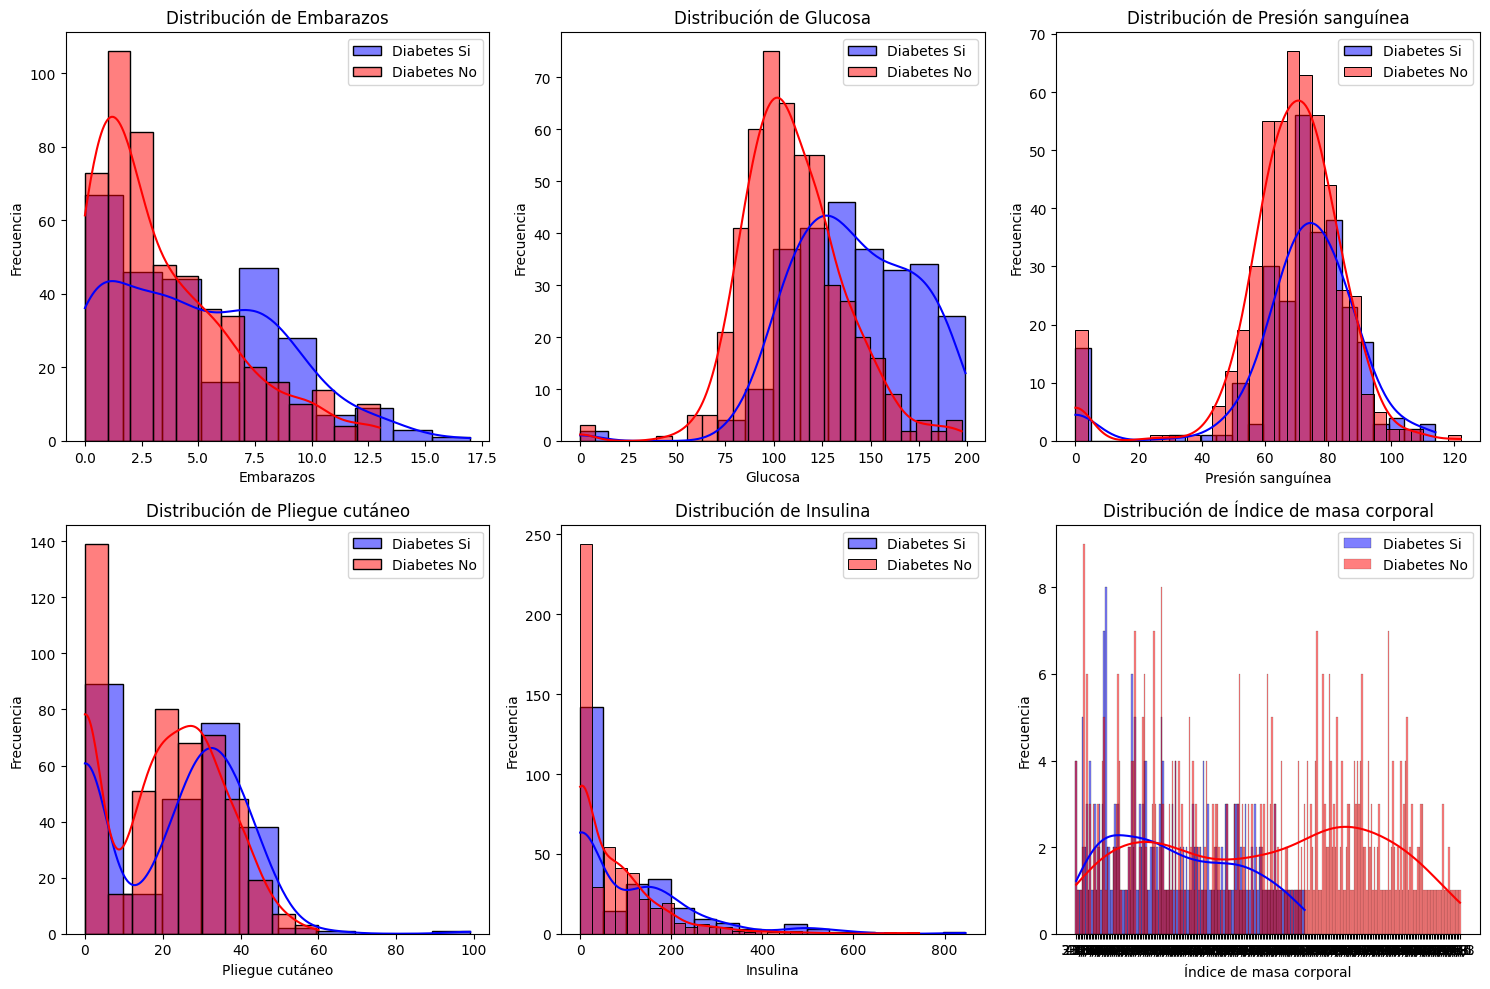

In [ ]:
# Filtrar los datos para separar los casos de diabetes y no diabetes
diabetes_si = df[df['Diabetes'] == 'Sí']
diabetes_no = df[df['Diabetes'] == 'No']

# Crear subplots para cada característica
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1][:6], 1):  # Limitamos a las primeras 6 columnas
    plt.subplot(2, 3, i)
    sns.histplot(diabetes_si[column], kde=True, color='blue', alpha=0.5, label='Diabetes Si')
    sns.histplot(diabetes_no[column], kde=True, color='red', alpha=0.5, label='Diabetes No')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.legend()

plt.tight_layout()
plt.show()

A primera vista, la glucosa parece el mas relevante, seguido quizas de embarazos e indice de mas corporal.

Podrian realizarse otra serie de diagramas para observar las distintas distribuciones para Diabetes si y diabetes no

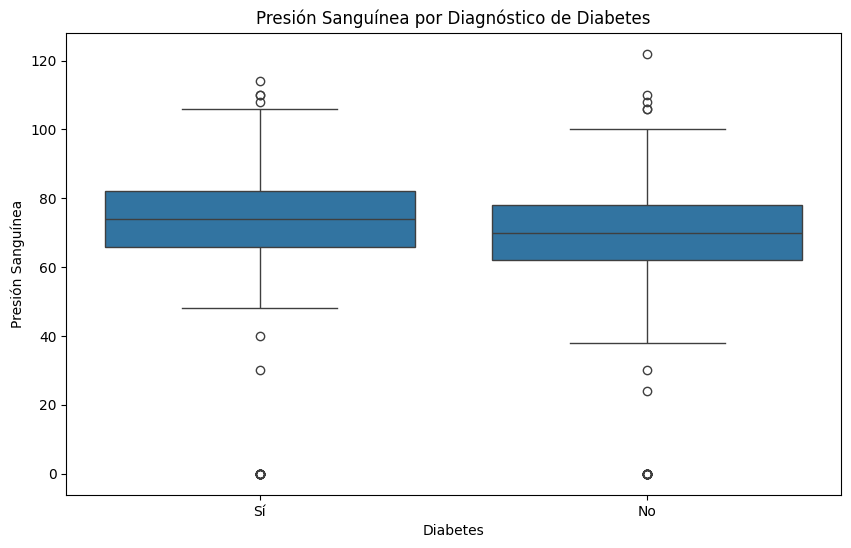

In [ ]:
# Boxplot de la presión sanguínea por diagnóstico de diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes', y='Presión sanguínea', data=df)
plt.title('Presión Sanguínea por Diagnóstico de Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Presión Sanguínea')
plt.show()

A continuacion se muestra la matriz de correlacion de todas las variables

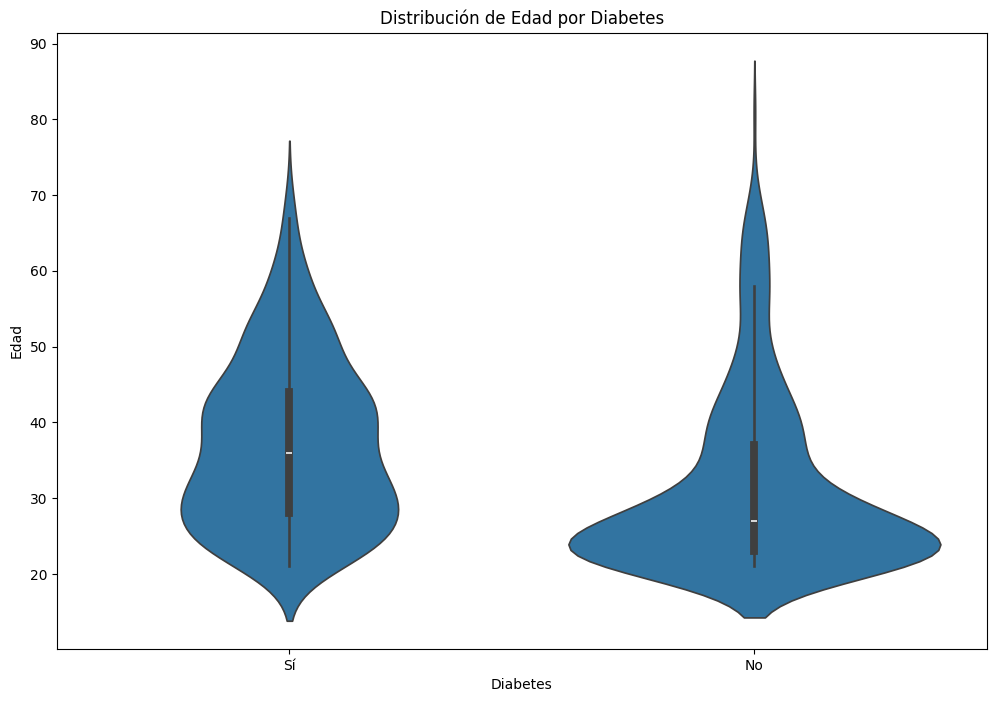

In [ ]:
# Violin Plot para Variables Numéricas vs. Diabetes
plt.figure(figsize=(12, 8))
sns.violinplot(x='Diabetes', y='Edad', data=df)
plt.title('Distribución de Edad por Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Edad')
plt.show()

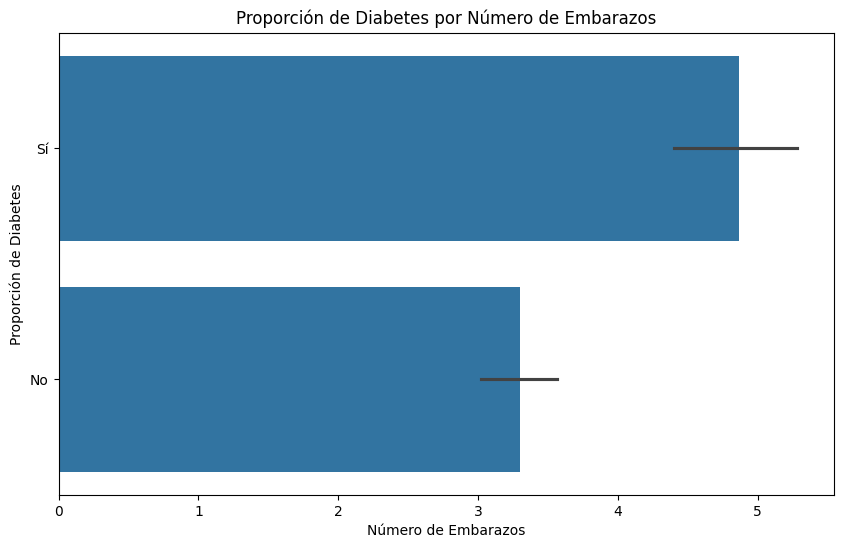

In [ ]:
# Gráfico de Proporciones de Diabetes por Categorías
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarazos', y='Diabetes', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Proporción de Diabetes por Número de Embarazos')
plt.xlabel('Número de Embarazos')
plt.ylabel('Proporción de Diabetes')
plt.show()

<ipython-input-18-73fd0fbb23f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


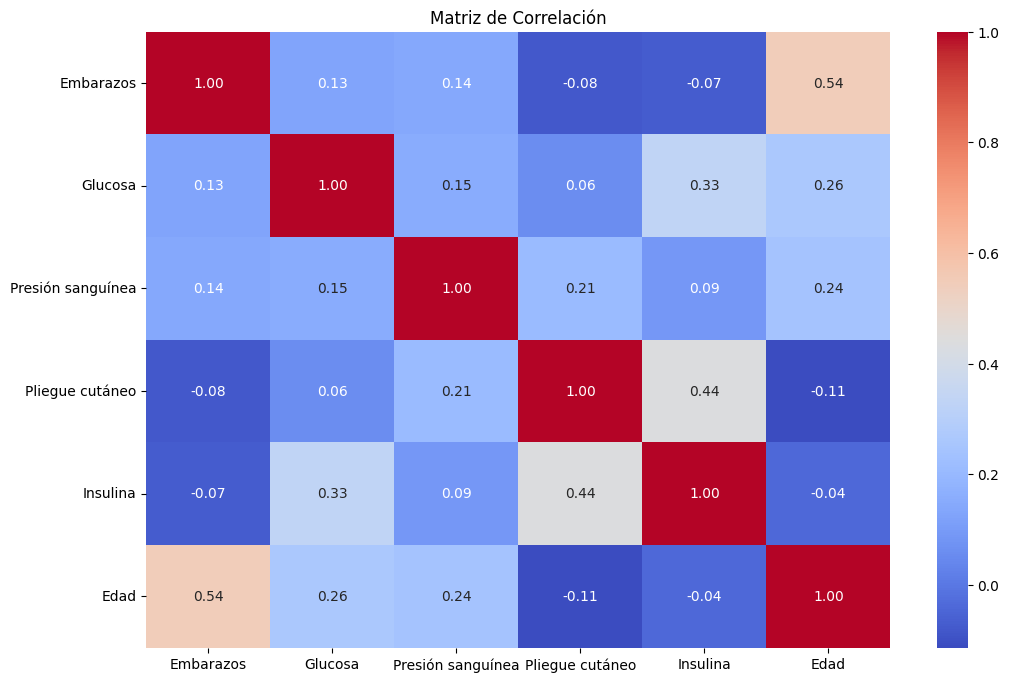

In [ ]:
correlation_matrix = df.corr()


# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Se busca entender tambien las variables categoricas de texto

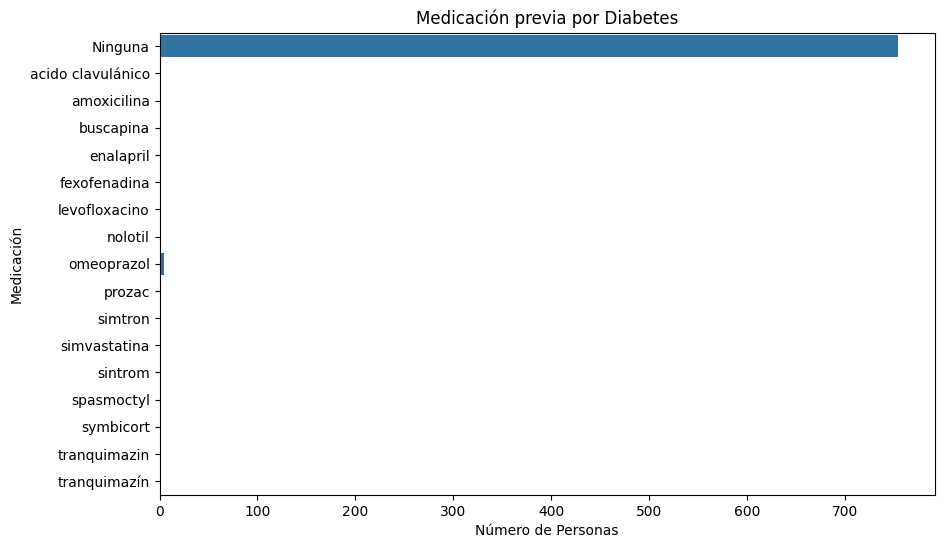

In [ ]:
# Gráfico de Barras Apiladas para Variables Categóricas
medicacion_diabetes = df['Medicación previa'].fillna('Ninguna').str.get_dummies(sep=',').sum().reset_index()
medicacion_diabetes.columns = ['Medicación', 'Personas']
plt.figure(figsize=(10, 6))
sns.barplot(x='Personas', y='Medicación', data=medicacion_diabetes)
plt.title('Medicación previa por Diabetes')
plt.xlabel('Número de Personas')
plt.ylabel('Medicación')
plt.show()

Se analiza el numero de las variables objetivos, a grandes diferencias en volumen de clases, esto pordría provocar falta de recall en modelos de clasificacion

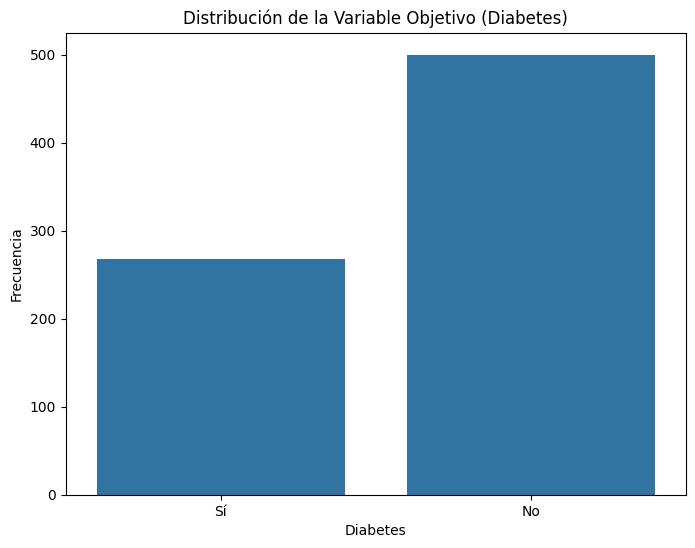

In [ ]:
# Gráfico de barras de la variable objetivo 'Diabetes'
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes', data=df)
plt.title('Distribución de la Variable Objetivo (Diabetes)')
plt.xlabel('Diabetes')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Embarazos                768 non-null    int64         
 1   Glucosa                  768 non-null    int64         
 2   Presión sanguínea        768 non-null    int64         
 3   Pliegue cutáneo          768 non-null    int64         
 4   Insulina                 768 non-null    int64         
 5   Índice de masa corporal  768 non-null    object        
 6   Pedigrí diabetes         768 non-null    object        
 7   Edad                     768 non-null    int64         
 8   Diabetes                 768 non-null    object        
 9   Medicación previa        14 non-null     object        
 10  Observaciones            13 non-null     object        
 11  Fecha de diagnóstico     766 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(6), obje

### Tranformacion datos para el modelo

In [ ]:
# Convertir las columnas 'Índice de masa corporal' y 'Pedigrí diabetes' a tipo float
df['Índice de masa corporal'] = df['Índice de masa corporal'].str.replace(',', '.').astype(float)
df['Pedigrí diabetes'] = df['Pedigrí diabetes'].str.replace(',', '.').astype(float)

# Verificar los tipos de datos después de la conversión
print(df.dtypes)

Embarazos                           int64
Glucosa                             int64
Presión sanguínea                   int64
Pliegue cutáneo                     int64
Insulina                            int64
Índice de masa corporal           float64
Pedigrí diabetes                  float64
Edad                                int64
Diabetes                           object
Medicación previa                  object
Observaciones                      object
Fecha de diagnóstico       datetime64[ns]
dtype: object


In [ ]:
df.drop("Fecha de diagnóstico", axis=1, inplace=True)

In [ ]:
# Cambiar los valores nulos de 'Medicación previa' y 'Observaciones' a cadenas informativas
df['Medicación previa'] = df['Medicación previa'].fillna('Sin medicación previa')
df['Observaciones'] = df['Observaciones'].fillna('Sin observaciones')

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Inicializar LabelEncoder para las columnas categóricas
label_encoder = LabelEncoder()

# Transformar las columnas categóricas 'Diabetes' y 'Medicación previa' usando LabelEncoder
df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'])
df['Medicación previa'] = label_encoder.fit_transform(df['Medicación previa'].fillna('Sin medicación previa'))
df['Observaciones'] = label_encoder.fit_transform(df['Observaciones'])


# Inicializar StandardScaler para las columnas numéricas
scaler = StandardScaler()

# Escalar las columnas numéricas
numeric_cols = ['Embarazos', 'Glucosa', 'Presión sanguínea', 'Pliegue cutáneo', 'Insulina',
                'Índice de masa corporal', 'Pedigrí diabetes', 'Edad']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df.head()

,Embarazos,Glucosa,Presión sanguínea,Pliegue cutáneo,Insulina,Índice de masa corporal,Pedigrí diabetes,Edad,Diabetes,Medicación previa,Observaciones
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1,0,13
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0,10,13
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1,0,13
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0,0,13
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1,7,13


### Random forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

Precisión del modelo Random Forest en el conjunto de prueba: 0.7304347826086957


<ipython-input-27-b85ea4c162c9>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


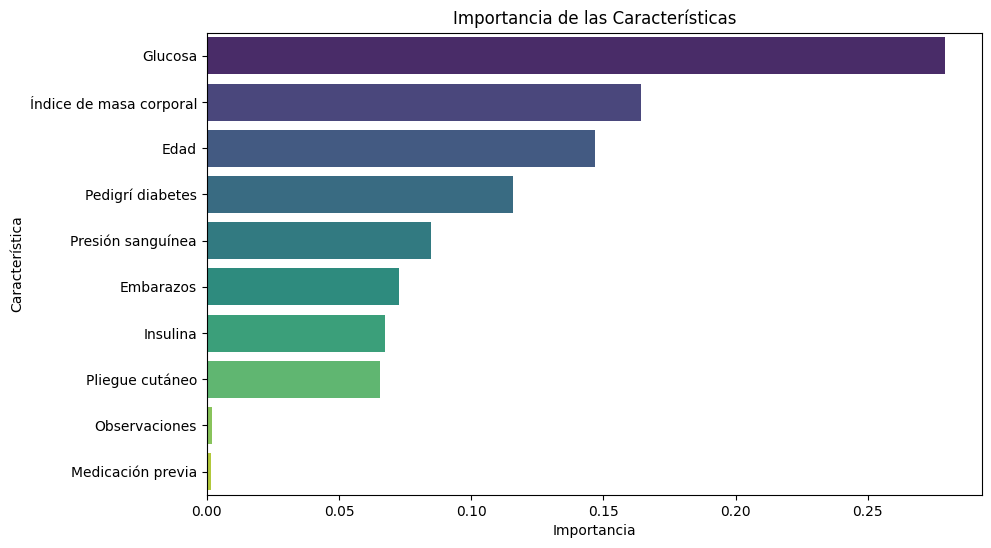

In [ ]:


# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Dividir el conjunto de datos en entrenamiento (70%), prueba (15%) y validación (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Inicializar y ajustar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy = rf_model.score(X_test, y_test)
print("Precisión del modelo Random Forest en el conjunto de prueba:", accuracy)

# Obtener la importancia de las características
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [ ]:
# Parece obvio elimnar Observacion y Medicaion previa, podrían plantearse elimnar mas variables para simplificar el sistema.
X = df.drop(['Diabetes','Observaciones','Medicación previa'], axis=1)
y = df['Diabetes']

# Dividir el conjunto de datos en entrenamiento (70%), prueba (15%) y validación (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Modelos supervisados

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Inicializar y ajustar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Inicializar y ajustar el modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Inicializar y ajustar el modelo Bayesiano
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Inicializar y ajustar el modelo de Árbol de Decisiones
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)



#### Evaluacion modelos



In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Calcular la precisión
    accuracy = precision_score(y_test, y_pred)

    # Calcular la curva ROC y el área bajo la curva (AUC)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Graficar la matriz de confusión
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
    plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

    # Graficar la curva ROC
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

    # Mostrar precisión en el gráfico
    plt.text(0.95, 0.05, 'Precision={0:0.2f}'.format(accuracy), ha='right', va='center', transform=plt.gca().transAxes, color='green')

    plt.tight_layout()
    plt.show()


Random Forest:



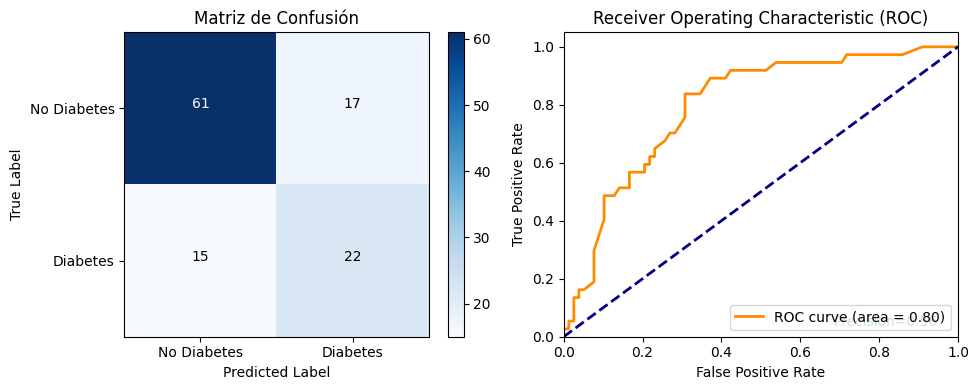


Logistic Regression:



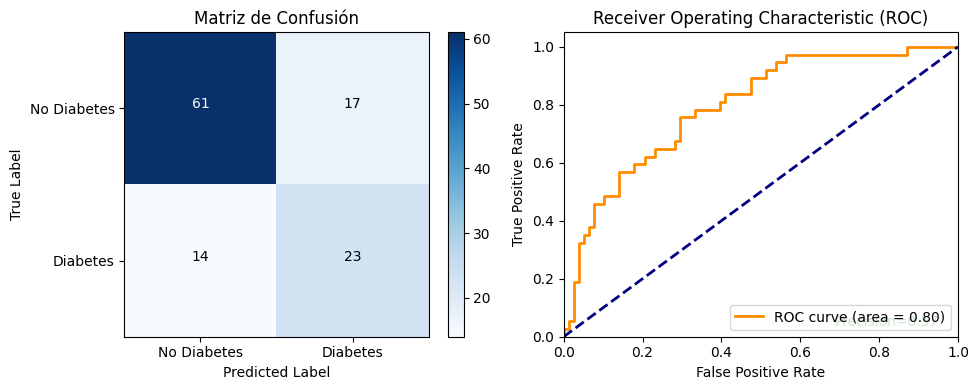


Naive Bayes:



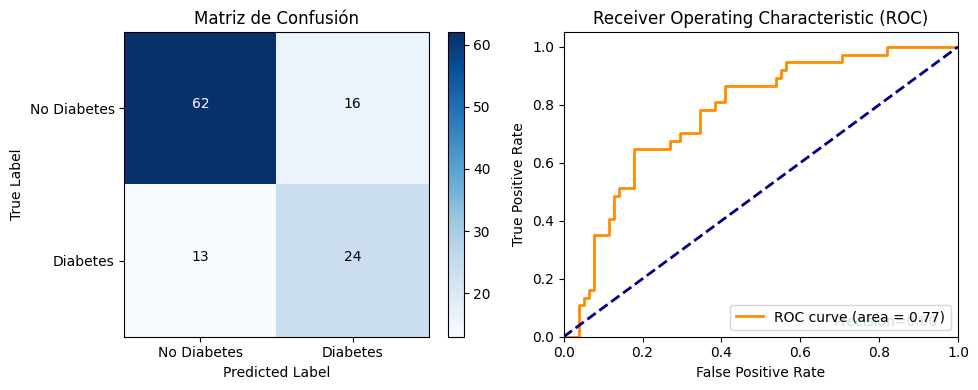


Decision Tree:



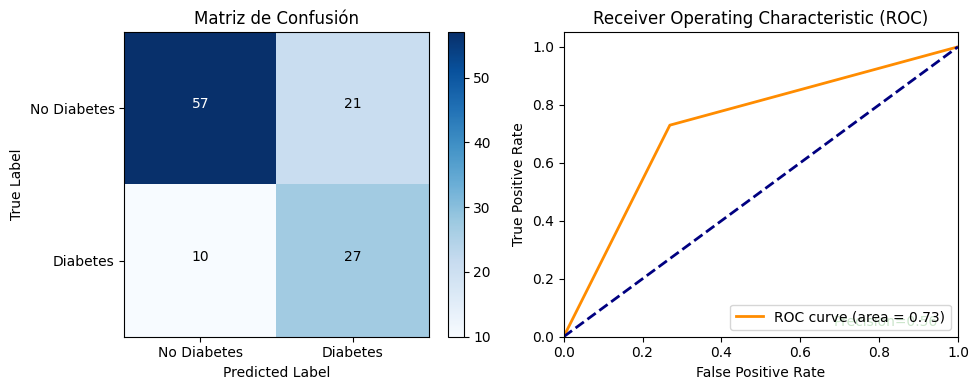

In [ ]:
# Evaluar cada modelo
models = {'Random Forest': rf_model, 'Logistic Regression': lr_model, 'Naive Bayes': nb_model, 'Decision Tree': dt_model}
for name, model in models.items():
    print(f"\n{name}:\n")
    evaluate_model(model, X_train, X_test, y_train, y_test)

Error de Falso Negativo (FN):
Penalizar el error de falso negativo en la detección de diabetes sería altamente perjudicial. Un falso negativo significa que un paciente que realmente tiene diabetes se clasifica incorrectamente como no diabético. Esto podría retrasar el diagnóstico y el tratamiento adecuado, lo que potencialmente llevaría a complicaciones graves y riesgo de vida para el paciente.

Error de Falso Positivo (FP):
Aunque un falso positivo en la detección de diabetes puede causar preocupación y estrés innecesario para el paciente, generalmente se considera menos grave que un falso negativo en este contexto. Es posible que se realicen más pruebas y evaluaciones para confirmar el diagnóstico, pero no existen riesgos inmediatos para la salud asociados con un falso positivo.

### Probamos ahora con otras variables

In [ ]:
# Parece obvio elimnar Observacion y Medicaion previa, podrían plantearse elimnar mas variables para simplificar el sistema.
X_glucosa_train = X_train[['Glucosa', 'Índice de masa corporal', 'Edad']]
X_glucosa_test = X_test[['Glucosa', 'Índice de masa corporal', 'Edad']]
y = df['Diabetes']


In [ ]:
# Inicializar y ajustar el modelo Random Forest
rf_model_glucosa = RandomForestClassifier(random_state=42)
rf_model_glucosa.fit(X_glucosa_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Inicializar y ajustar el modelo de Regresión Logística
lr_model_glucosa = LogisticRegression(random_state=42)
lr_model_glucosa.fit(X_glucosa_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Inicializar y ajustar el modelo Bayesiano
nb_model_glucosa = GaussianNB()
nb_model_glucosa.fit(X_glucosa_train, y_train)

GaussianNB()

In [ ]:
# Inicializar y ajustar el modelo de Árbol de Decisiones
dt_model_glucosa = DecisionTreeClassifier(random_state=42)
dt_model_glucosa.fit(X_glucosa_train, y_train)

DecisionTreeClassifier(random_state=42)


Random Forest:



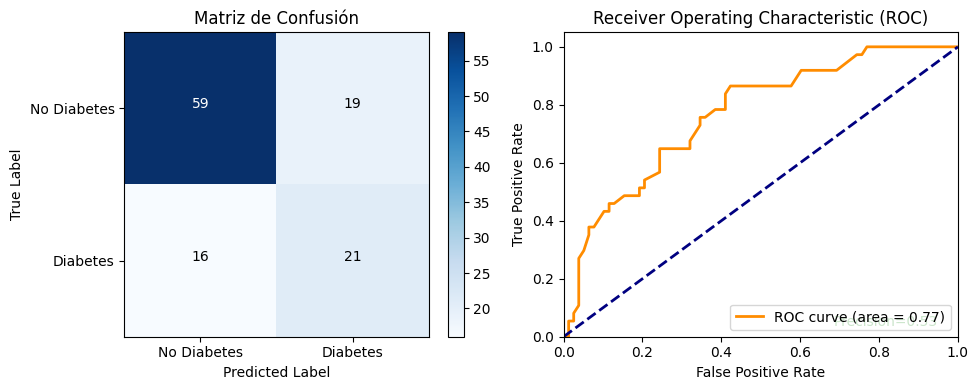


Logistic Regression:



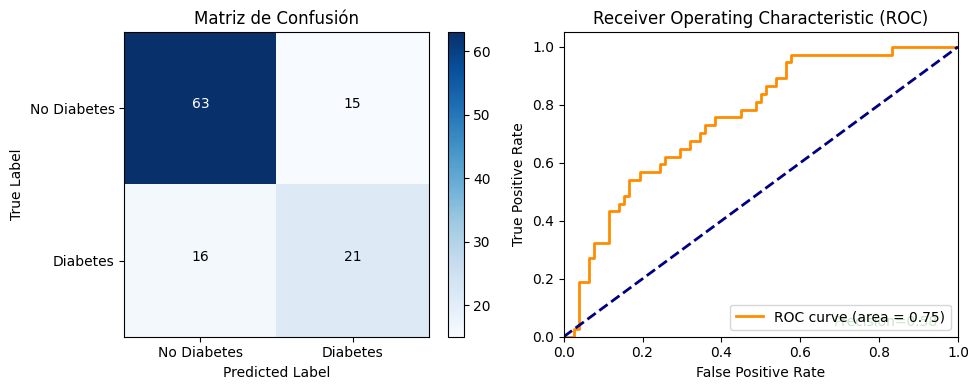


Naive Bayes:



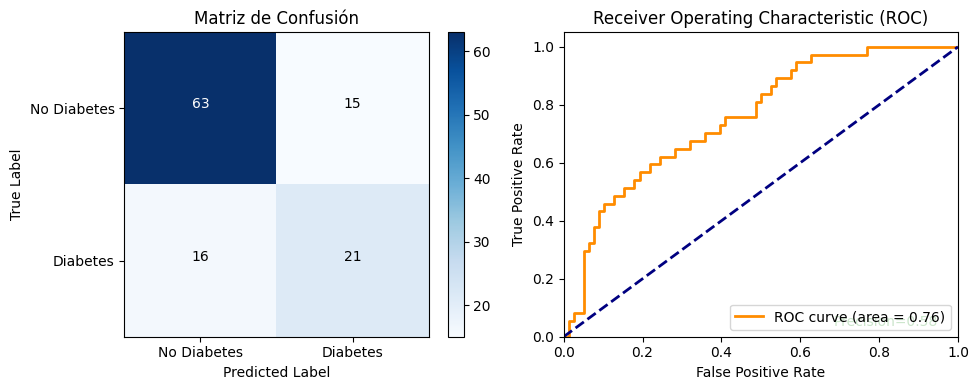


Decision Tree:



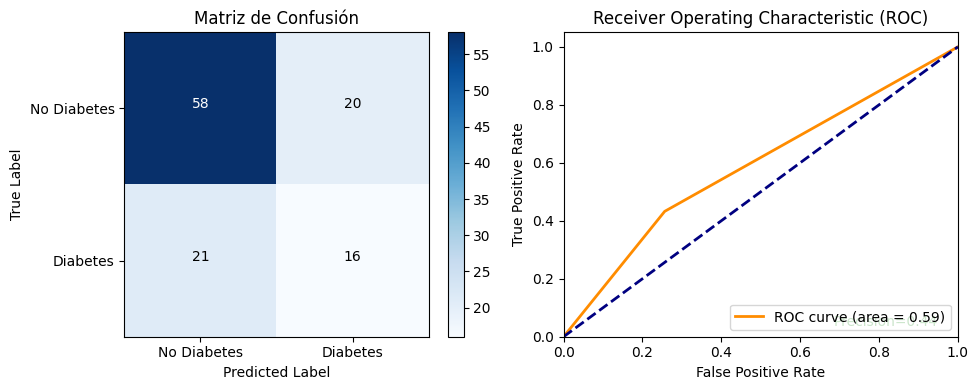

In [ ]:
# Evaluar cada modelo
models = {'Random Forest': rf_model_glucosa, 'Logistic Regression': lr_model_glucosa, 'Naive Bayes': nb_model_glucosa, 'Decision Tree': dt_model_glucosa}
for name, model in models.items():
    print(f"\n{name}:\n")
    evaluate_model(model, X_glucosa_train, X_glucosa_test, y_train, y_test)

Conclusiones:

Los modelos con todas las variables, salvo Observacoines y Medicacion Previa parecen los mas precisos.

En cuanto a la eliminacion de estas dos variables, su poca importancia se debe probabalemente a la gran cantidad de nulos e informacion no completada e insuficiente. Quizas con un entrenamiento de los faramaceuticos para que compeltementen mejor estas columnas, podrían ser más útiles en un futuro modelo.

En cuanto a la eleccion del modelo Naives Bayes tiene la mayor precision. Sin embargo si nuestra intención es detectar el maximo numero de casos de Diabetes, y reducir el maximo numero de casos sin detectar deberiamos seleccionar el arbol de decision, dada la pequeña diferencia entre ambos, esto parece lo apropiado.



### Evaluacion final en el test de Evaluacion


Random Forest:



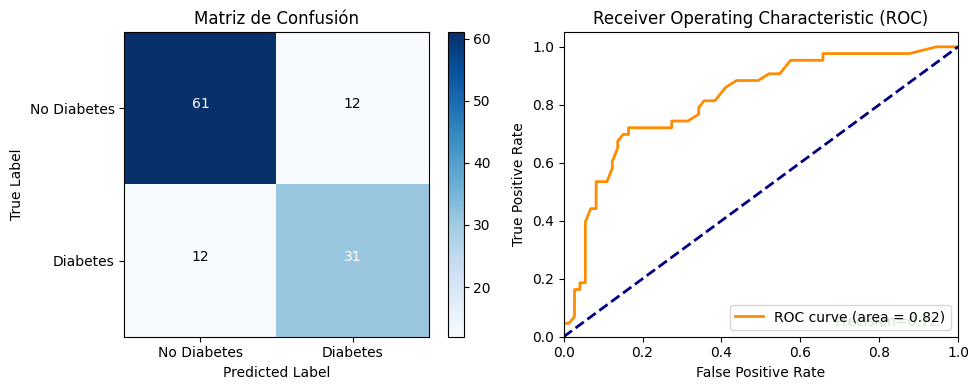


Logistic Regression:



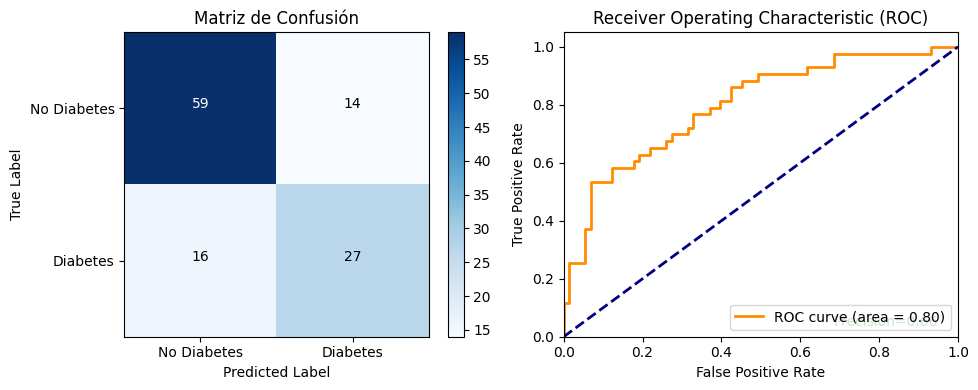


Naive Bayes:



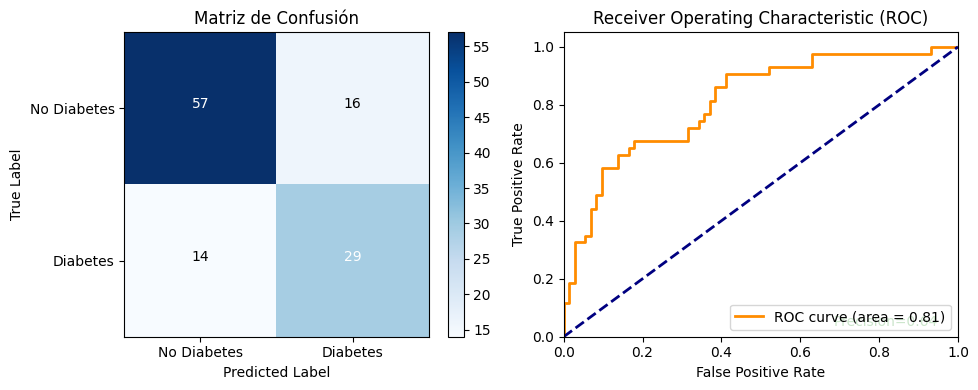


Decision Tree:



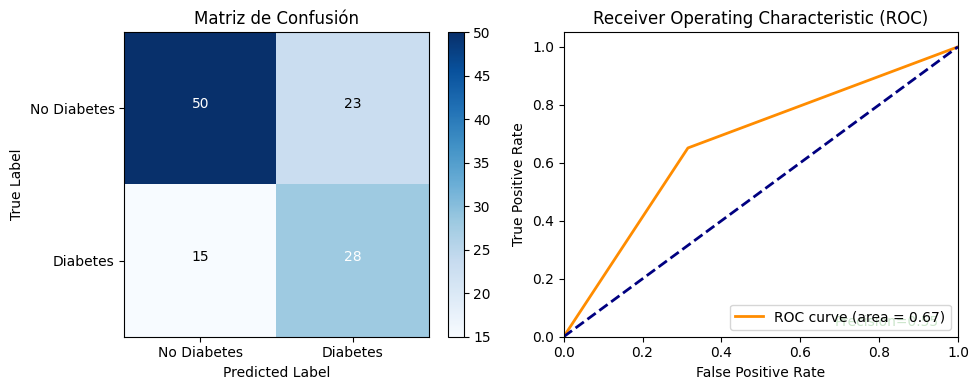

In [ ]:
# Evaluar cada modelo
models = {'Random Forest': rf_model, 'Logistic Regression': lr_model, 'Naive Bayes': nb_model, 'Decision Tree': dt_model}
for name, model in models.items():
    print(f"\n{name}:\n")
    evaluate_model(model, X_train, X_val, y_train, y_val)